# Markov decision process 

In [24]:
# import
import gym
import numpy as np
from IPython import display
import matplotlib.pyplot as plt

In [2]:
# CartPorl Environment
env = gym.make('MountainCar-v0')

In [3]:
# initial state
init_state = env.reset()
print(f'The initial state {init_state}')

The initial state [-0.58417124  0.        ]


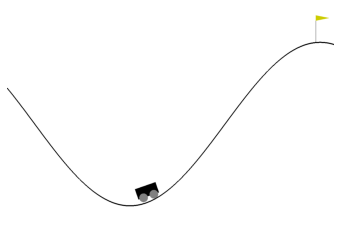

In [6]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)
env.close()

### Observation and Action
#### Observation
The observation is a `ndarray` with shape `(2,)` where the elements correspond to the following:
| Num | Observation                                                 | Min                | Max    | Unit |
|-----|-------------------------------------------------------------|--------------------|--------|------|
| 0   | position of the car along the x-axis                        | -Inf               | Inf    | position (m) |
| 1   | velocity of the car                                         | -Inf               | Inf  | position (m) |

#### Actions
There are 3 discrete deterministic actions:
| Num | Observation                                                 | Value   | Unit |
|-----|-------------------------------------------------------------|---------|------|
| 0   | Accelerate to the left                                      | Inf    | position (m) |
| 1   | Don't accelerate                                            | Inf  | position (m) |
| 2   | Accelerate to the right                                     | Inf    | position (m) |

### Trajectories and Episodes

In [4]:
# generate first 3 trajectories
state = env.reset()
trajectory = []
for _ in range(3):
    action = env.action_space.sample()
    next_state, reward, done, info = env.step(action)
    trajectory.append([state,action,reward,done,next_state])
    state = next_state
    
env.close
print(f'First 3 trajectory:\n{trajectory}')


First 3 trajectory:
[[array([-0.47620684,  0.        ], dtype=float32), 1, -1.0, False, array([-4.7656107e-01, -3.5424330e-04], dtype=float32)], [array([-4.7656107e-01, -3.5424330e-04], dtype=float32), 2, -1.0, False, array([-4.7626692e-01,  2.9414363e-04], dtype=float32)], [array([-4.7626692e-01,  2.9414363e-04], dtype=float32), 0, -1.0, False, array([-0.47732657, -0.00105965], dtype=float32)]]


In [7]:
# generate one full epsoide
obs = env.reset()
done = False
episoide = []
while not done:
    action = env.action_space.sample()
    next_state, reward, done, info = env.step(action)
    episoide.append([next_state, reward, done, info])
    obs = next_state
    
env.close()
print(f'One Full episoide\n:{episoide}')
    

One Full episoide
:[[array([-0.5267803,  0.0010316], dtype=float32), -1.0, False, {}], [array([-5.2672482e-01,  5.5458502e-05], dtype=float32), -1.0, False, {}], [array([-0.52764595, -0.0009211 ], dtype=float32), -1.0, False, {}], [array([-0.5285367 , -0.00089074], dtype=float32), -1.0, False, {}], [array([-0.5293904 , -0.00085371], dtype=float32), -1.0, False, {}], [array([-5.2920067e-01,  1.8972422e-04], dtype=float32), -1.0, False, {}], [array([-0.5299689 , -0.00076826], dtype=float32), -1.0, False, {}], [array([-0.5316894 , -0.00172049], dtype=float32), -1.0, False, {}], [array([-0.5323492 , -0.00065982], dtype=float32), -1.0, False, {}], [array([-0.5339434, -0.0015942], dtype=float32), -1.0, False, {}], [array([-0.53546005, -0.00151662], dtype=float32), -1.0, False, {}], [array([-0.5368877 , -0.00142768], dtype=float32), -1.0, False, {}], [array([-0.53921574, -0.00232804], dtype=float32), -1.0, False, {}], [array([-0.5414267 , -0.00221096], dtype=float32), -1.0, False, {}], [array

### Rewards and Returns
**Reward** is numerical feedback that the environment generates when the agent takes an action `a` in a state `s`
\begin{equation}
    r = r(s, a)
\end{equation}

In [8]:
state = env.reset()
action = env.action_space.sample()
_, reward, _, _ = env.step(action)
print(f'Reward of {reward} by taking action {action} in state {state}')

Reward of -1.0 by taking action 2 in state [-0.5317942  0.       ]


**Return** associated with a moment in time `t` is the sum (*discounted*) of rewards that the agent obtains from the moment.
\begin{equation}
    G_0 = R_1 + \gamma R_2 + \gamma^2 R_3 + ... + \gamma^{T-1} R_T
\end{equation}

In [9]:
# assume that the discount factor gamma = .99
state = env.reset()
done = False
gamma = .99
g_0 = 0
timestep = 0

while not done:
    action = env.action_space.sample()
    _, reward, done, _ = env.step(action)
    g_0 += gamma ** timestep * reward
    timestep += 1

env.close()
print(f'It took us {timestep} moves to reach the goal, and each reward r(s, a), so the return amounts to {g_0}')

It took us 200 moves to reach the goal, and each reward r(s, a), so the return amounts to -86.6020325142037


#### Policy
**Policy** is a function  $\pi(a|s) \in [0, 1]$ that gives the probabilitiy of an action given the current state. The fucntion takes the state and action as inputs and returns a float in [0,1].


In [12]:
# randomly chooses actions 
def random_policy(state):
    return np.array([.33]*3)

In [13]:
action_probabilities = random_policy(state=env.reset())

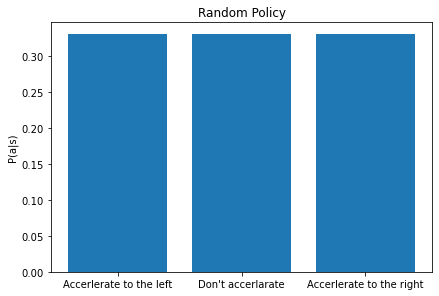

In [19]:
actions = ('Accerlerate to the left', 'Don\'t accerlarate', 'Accerlerate to the right')
y_pos = np.arange(len(actions))

plt.bar(y_pos, action_probabilities,)
plt.xticks(y_pos, actions)
plt.tight_layout()
plt.ylabel('P(a|s)')
plt.title('Random Policy')
plt.show()

In [ ]:
env.reset()
done = False
img = plt.imshow(env.render(mode='rgb_array'))
while not done:
    _, _, done, _ = env.step(env.action_space.sample())
    img.set_data(env.render(mode='rgb_array'))
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    
env.close()